## Importing necessary modules

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix 
from imblearn.combine import SMOTETomek
import pickle

import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')


stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_lemmatizer = WordNetLemmatizer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

[nltk_data] Downloading package wordnet to C:\Users\GAUTHAM
[nltk_data]     GOPI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\GAUTHAM
[nltk_data]     GOPI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GAUTHAM
[nltk_data]     GOPI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.shape

(17880, 18)

In [4]:
df['description'][0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [5]:
fake=df[df['fraudulent']==1]
fake.reset_index(inplace=True)
fake.head(30)

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
4,215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
5,357,358,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,NaN,1
6,493,494,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
7,537,538,Technology Consultant - Outside Sales,"US, OH,",NaN,NaN,NaN,Apply below using link#URL_00962c0bdac3ecf40b2...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Information Technology and Services,NaN,1
8,573,574,Senior Engineering Product Manager,"US, CA, San Jose",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1
9,584,585,Quality Improvement Manager,"US, FL,",NaN,NaN,NaN,Apply using below link#URL_8b28dea5804b323e29d...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1


In [6]:
fake['company_profile'][0]

"\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases\xa0Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. \xa0You'll save thousands on daily expenditures\xa0Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refi

In [7]:
fake['description'][0]

'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

In [8]:
fake['requirements'][0]

'QualificationsKnowledge, Skills &amp; Abilities:\xa0A high school diploma or GED is required. Must have a valid driver’s license. Ability to read, write, and communicate effectively in English.\xa0\xa0Good math skills.\xa0Four years of experience as an I&amp;C Technician and/or Electrician in a power plant environment, preferably with a strong electrical background, up to and including, voltages to 15 KV to provide the following:Demonstrated knowledge of electrical equipment, electronics, schematics, basics of chemistry and physics and controls and instrumentation.Demonstrated knowledge of safe work practices associated with a power plant environment.Demonstrated ability to calibrate I&amp;C systems and equipment, including analytic equipment.Demonstrated ability to configure and operate various test instruments and equipment, as necessary, to troubleshoot and repair plant equipment including, but not limited to, distributed control systems, programmable logic controllers, motor contr

## Data Preprocessing

In [9]:
df.shape

(17880, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [11]:
print('Data type of each column of Dataframe :')
df.dtypes

Data type of each column of Dataframe :


job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [12]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Checking for missing values
df[df.columns].isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:>

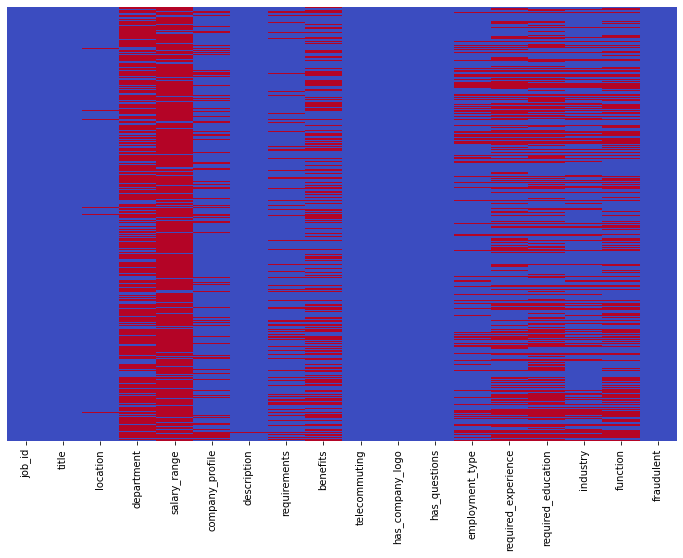

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap="coolwarm", yticklabels=False, cbar=False)

In [15]:
#Replace missing values with empty string because only object columns have missing values
df = df.replace(np.nan, '', regex=True)

In [16]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [17]:
#Differentiating Numerical and Categorical columns
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

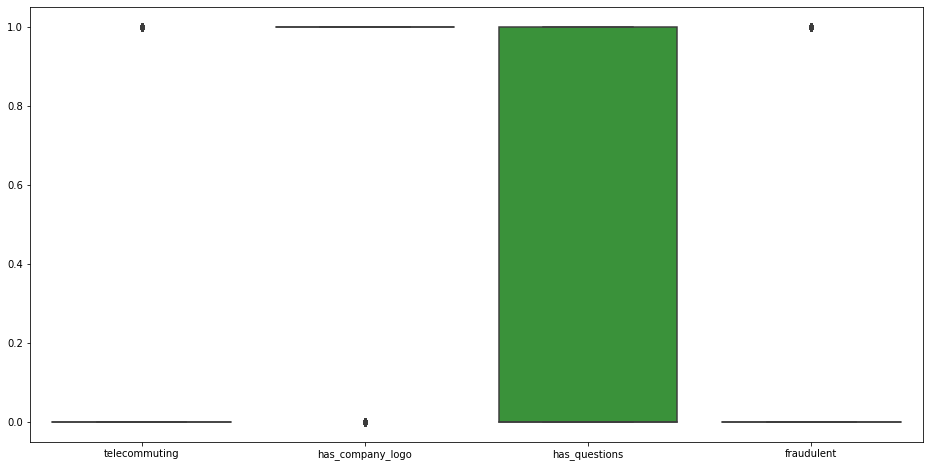

In [18]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

<b>There are minimal outliers and so they are ignored<b>

In [19]:
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

<b>5% Fake job post.<b>

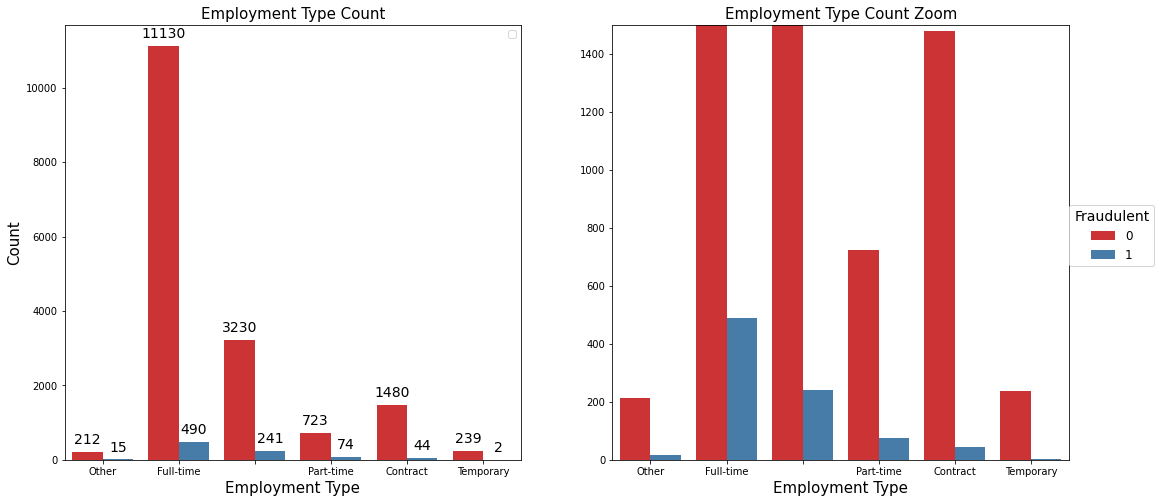

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))

employ = sns.countplot(x=df["employment_type"].dropna(), hue=df["fraudulent"], palette="Set1", ax=axes[0])
axes[0].set_xlabel("Employment Type", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].set_title("Employment Type Count", fontsize=15)
axes[0].legend("")

for p in employ.patches:
    employ.annotate("{:.0f}".format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 12),
                        textcoords='offset points')

employ_zoom = sns.countplot(x=df["employment_type"].dropna(), hue=df["fraudulent"], palette="Set1", ax=axes[1])
axes[1].set_xlabel("Employment Type", fontsize=15)
axes[1].set_ylim((0, 1500))
axes[1].set_ylabel("")
axes[1].set_title("Employment Type Count Zoom", fontsize=15)
axes[1].legend(title="Fraudulent", title_fontsize=14, fontsize=12, bbox_to_anchor=(1.2, 0.6));

<b>The graph on the left shows the employment count for each employment type.<br> 
    The graph on the right shows the same information but it is zoomed in.<b>

In [21]:
# Creating columns to denote length of text
feature_lst = ["company_profile", "description", "requirements"]
for num,col in enumerate(feature_lst):
    df[str(num)] = df[col].apply(len)
df = df.rename({"0": "profile_length", "1": "description_length", "2": "requirements_length"}, axis=1)    

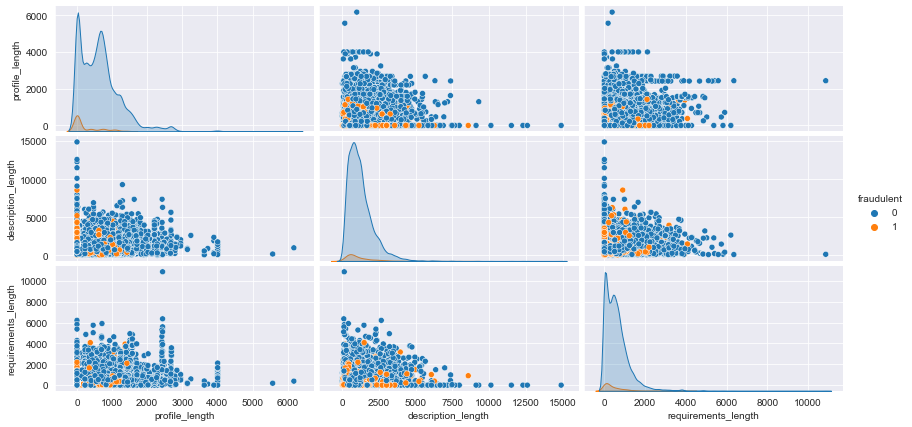

In [22]:
sns.set_style("darkgrid")
sns.pairplot(data=df[["fraudulent", "profile_length", "description_length", "requirements_length"]],
             hue="fraudulent", height=2, aspect=2);

<b>The text length of the columns above does not show a different pattern for fraudulent or non-fraudulent posts.<b>

<b>Taking a closer look at the individual columns<b>

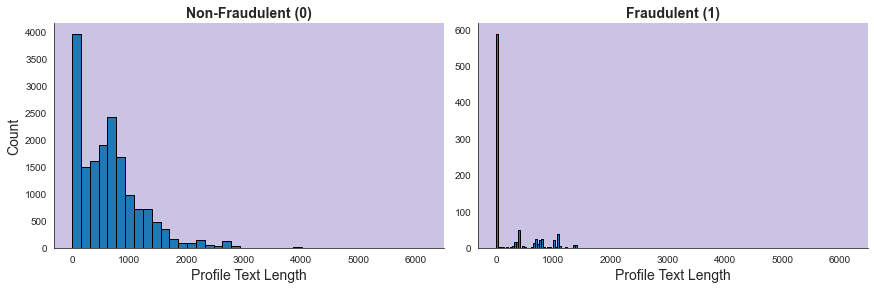

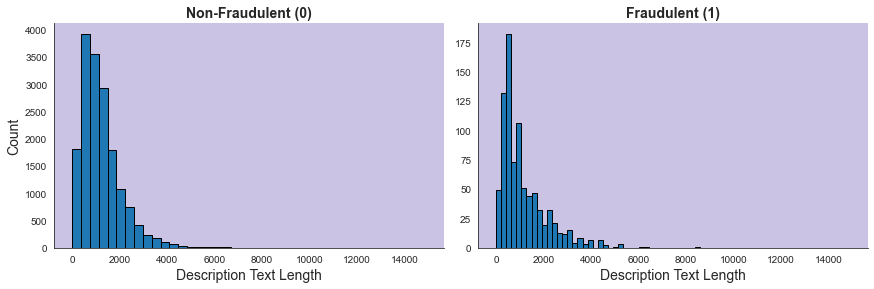

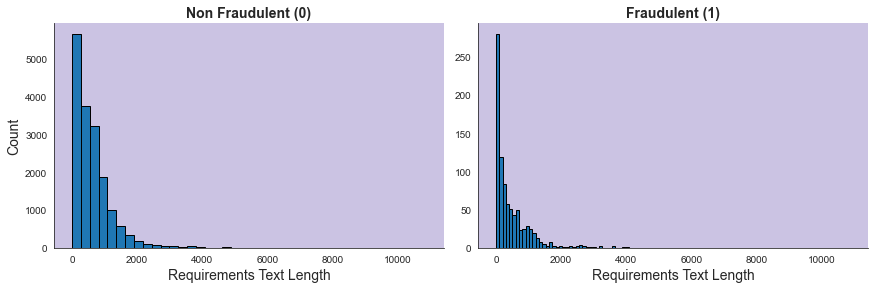

In [23]:
sns.set_style("white")
profile_grid = sns.FacetGrid(df, col="fraudulent", aspect=1.5, height=4, sharey=False)
profile_grid = profile_grid.map(plt.hist, "profile_length", bins=40, edgecolor = "black")

# Flatten the axes. Create an iterator
axes = profile_grid.axes.flatten()

# Title
axes[0].set_title("Non-Fraudulent (0)", fontsize=14, fontweight='bold')
axes[1].set_title("Fraudulent (1)", fontsize=14, fontweight='bold')

# Labels
axes[0].set_ylabel("Count", fontsize=14)
for ax in axes:
    ax.set_facecolor("#CBC3E3")
    ax.set_xlabel("Profile Text Length", fontsize=14)

description_grid = sns.FacetGrid(df, col="fraudulent", aspect=1.5, height=4, sharey=False)
description_grid = description_grid.map(plt.hist, "description_length", bins=40, edgecolor = "black")

# Flatten the axes. Create an iterator
axes = description_grid.axes.flatten()

# Title
axes[0].set_title("Non-Fraudulent (0)", fontsize=14, fontweight='bold')
axes[1].set_title("Fraudulent (1)", fontsize=14, fontweight='bold')

# Labels
axes[0].set_ylabel("Count", fontsize=14)
for ax in axes:
    ax.set_facecolor("#CBC3E3")
    ax.set_xlabel("Description Text Length", fontsize=14)

requirements_grid = sns.FacetGrid(df, col="fraudulent", aspect=1.5, height=4, sharey=False)
requirements_grid = requirements_grid.map(plt.hist, "requirements_length", bins=40, edgecolor = "black")

# Another option. Makes less obviuos which axes is to be labelled
#requirements_grid.set_axis_labels("Requirement Length", "Count")

# Flatten the axes. Create an iterator
axes = requirements_grid.axes.flatten()

# Title
axes[0].set_title("Non Fraudulent (0)", fontsize=14, fontweight='bold')
axes[1].set_title("Fraudulent (1)", fontsize=14, fontweight='bold')

# Labels
axes[0].set_ylabel("Count", fontsize=14)
for ax in axes:
    ax.set_facecolor("#CBC3E3")
    ax.set_xlabel("Requirements Text Length", fontsize=14)        

<b>From the above graphs we can infer that the vast majority of the fraudulent job posts do not have a company profile available.<b>

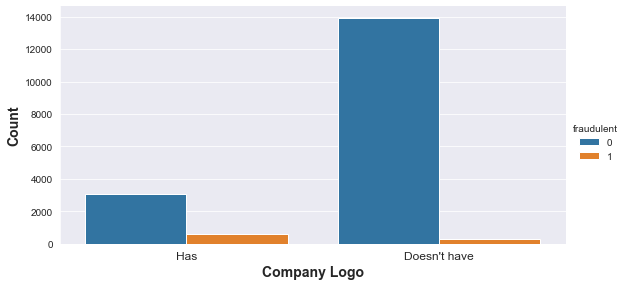

In [24]:
sns.set_style("darkgrid")
sns.catplot(x="has_company_logo", hue="fraudulent", data=df, kind="count", aspect=2, height=4);

plt.xlabel("Company Logo", fontsize=14, fontweight='bold')
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14, fontweight='bold');

<b>The post being either real or fake, the majority of the job posts collected in this dataset do not have a company logo. This suggests that not having a logo is not a determining factor.<b>

In [25]:
df.drop(["profile_length", "description_length", "requirements_length"],axis=1,inplace=True)

In [26]:
# # Joining the title, department, company_profile, description, requirements and benefits columns into a single column 'text'
# df['text'] = df[['title', 'department','company_profile','description','requirements','benefits']].apply(lambda x: ' '.join(x), axis = 1) 

In [27]:
# Joining the title, department, company_profile, description, requirements and benefits columns into a single column 'text'
df['text'] = df[['company_profile','description','requirements']].apply(lambda x: ' '.join(x), axis = 1) 

In [28]:
df['text']

0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878     Nemsia Studios is looking for an experienced ...
17879    Vend is looking for some awesome new talent to...
Name: text, Length: 17880, dtype: object

In [29]:
#Sample
df['text'][1]

"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auc

In [30]:
#Dropping the various columns since they were merged into 'text' column
df.drop(['company_profile','description','requirements','benefits'], axis=1, inplace=True)

In [31]:
#Industry with most fake job postings (ie. Oil & Energy)
df_industry = df[df['fraudulent']== 1]
df_industry['industry'].value_counts()

                             275
Oil & Energy                 109
Accounting                    57
Hospital & Health Care        51
Marketing and Advertising     45
                            ... 
Utilities                      1
Building Materials             1
Medical Devices                1
Airlines/Aviation              1
Outsourcing/Offshoring         1
Name: industry, Length: 63, dtype: int64

<AxesSubplot:>

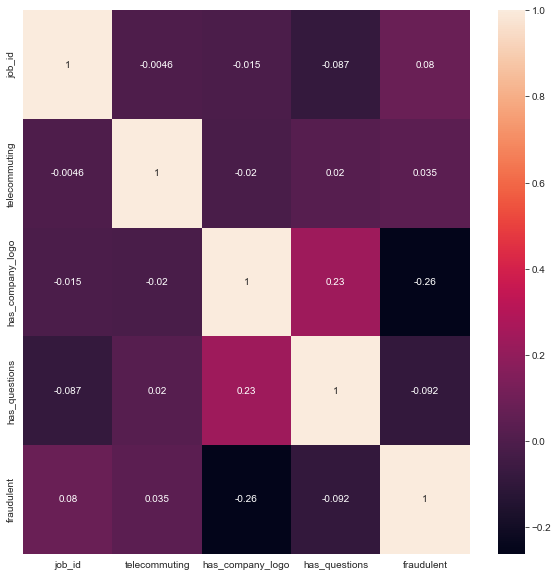

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [33]:
#Dropping additional columns which are not necessary
df.drop(['job_id', 'location','title','salary_range' ,'department','salary_range','telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],axis=1,inplace=True)

In [34]:
df.head()

,fraudulent,text
0,0,"We're Food52, and we've created a groundbreaki..."
1,0,"90 Seconds, the worlds Cloud Video Production ..."
2,0,Valor Services provides Workforce Solutions th...
3,0,Our passion for improving quality of life thro...
4,0,SpotSource Solutions LLC is a Global Human Cap...


In [35]:
#Reordering the dataframe so that the 'text' column is in the front
df_columns=df.columns.tolist()
df_columns = df_columns[-1:] + df_columns[:-1]
df = df[df_columns]
df.head()

,text,fraudulent
0,"We're Food52, and we've created a groundbreaki...",0
1,"90 Seconds, the worlds Cloud Video Production ...",0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0


In [36]:
#Function to clean the text
def clean_text(text, ):
        if text is not None:
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)
        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                #text = re.sub(r'[0-9]+','',text)
        # strip html 
                p = re.compile(r'<.*?>')
        # Replacing certain phrases or words    
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)
# Function to convert text into tokens
        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
# Function to remove stopwords
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)
# Function to stem the text
        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])
# Function to lemmatize the text
        def lem_text(text,lemmatizer = default_lemmatizer):
            tokens = tokenize_text(text)
            return ' '.join([lemmatizer.lemmatize(t) for t in tokens])


        text = stem_text(text) # stemming
        text=lem_text(text) #lemmatizing
        text = remove_stopwords(text) # remove stopwords
        #text.strip(' ') # strip whitespaces again?

        return text

In [37]:
df['text'] = df['text'].apply(clean_text)

In [38]:
df.head()

,text,fraudulent
0,food weve creat groundbreak awardwin cook site...,0
1,second world cloud video product servic second...,0
2,valor servic provid workforc solut meet need c...,0
3,passion improv qualiti life geographi heart ev...,0
4,spotsourc solut llc global human capit manag c...,0


In [39]:
df['text'].head()

0    food weve creat groundbreak awardwin cook site...
1    second world cloud video product servic second...
2    valor servic provid workforc solut meet need c...
3    passion improv qualiti life geographi heart ev...
4    spotsourc solut llc global human capit manag c...
Name: text, dtype: object

In [40]:
data={'dataframe':df}
with open('saved_df.pkl','wb') as file:
    pickle.dump(data,file)

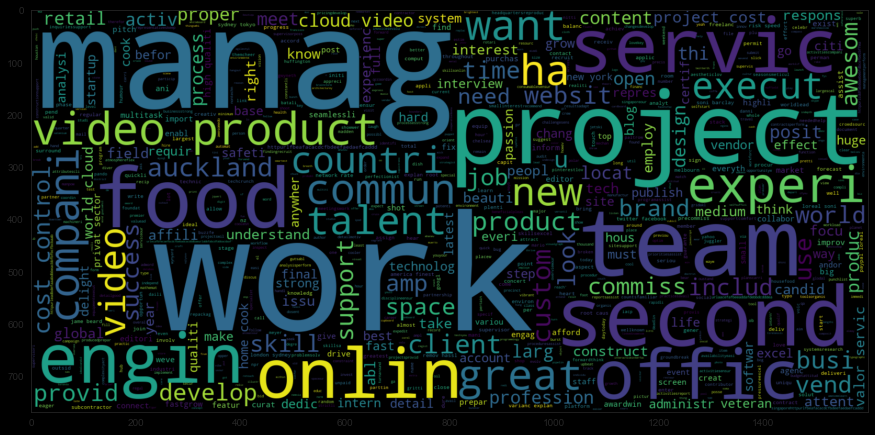

In [41]:
# Wordcloud of the overall text
sns.set_style("white")
wordcloud = WordCloud(
    width = 1600,
    height = 768,
    max_words=2500,
    background_color = 'black').generate(str(df.text.values))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

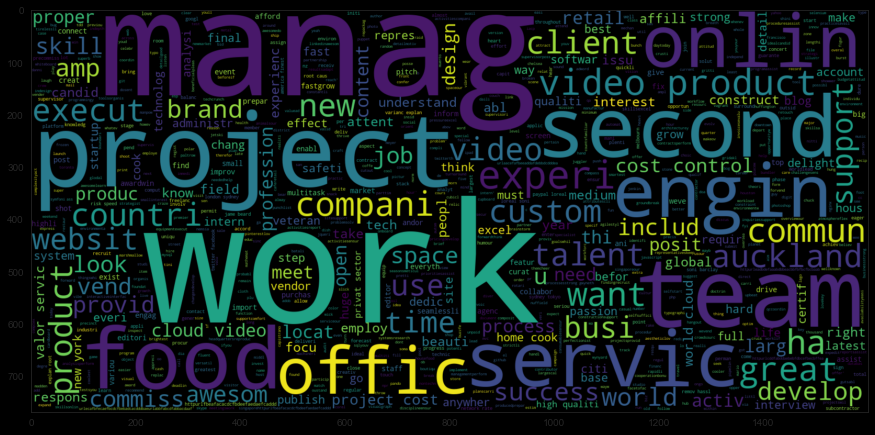

In [42]:
# Wordcloud of the text for genuine posting
sns.set_style("white")
df_genuine=df[df["fraudulent"]==0]
wordcloud = WordCloud(
    width = 1600,
    height = 768,
    max_words=2500,
    background_color = 'black').generate(str(df_genuine.text.values))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

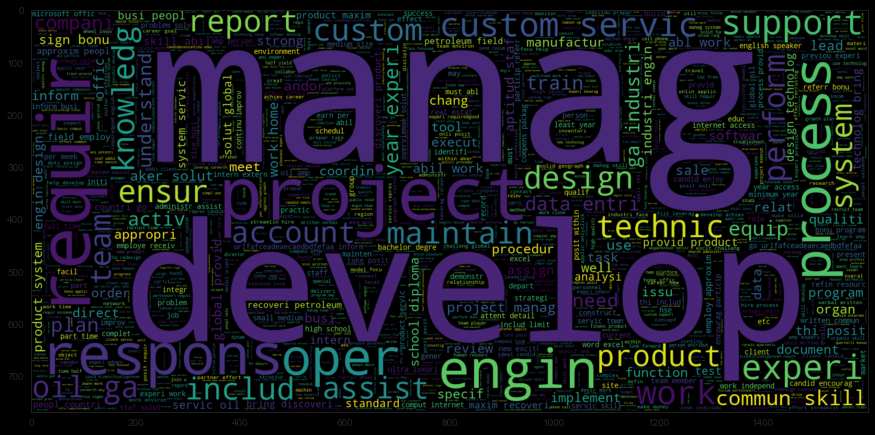

In [43]:
# Wordcloud of the text for fake posting
sns.set_style("white")
df_fake=df[df["fraudulent"]==1]
wordcloud = WordCloud(
    width = 1600,
    height = 768,
    max_words=2500,
    background_color = 'black').generate(str(df_fake.text.values))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [44]:
# Converts text into feature vector to be used in a classifier model
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(["text"], axis=1, inplace=True)
main_df = pd.concat([df1,df], axis=1)

In [45]:
main_df.head()

,abil,abl,account,also,amp,applic,base,best,build,busi,...,time,understand,use,web,well,within,work,world,year,fraudulent
0,0.000000,0.000000,0.000000,0.130533,0.115603,0.000000,0.000000,0.134529,0.000000,0.099804,...,0.105861,0.000000,0.112689,0.0,0.000000,0.000000,0.287170,0.000000,0.000000,0
1,0.000000,0.041675,0.048471,0.000000,0.070021,0.000000,0.037005,0.000000,0.000000,0.090678,...,0.032060,0.037899,0.034128,0.0,0.000000,0.000000,0.130455,0.379795,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.108555,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.134832,0.000000,0.000000,0
3,0.040694,0.000000,0.545857,0.000000,0.000000,0.000000,0.000000,0.000000,0.041161,0.306350,...,0.000000,0.170718,0.000000,0.0,0.000000,0.096526,0.048971,0.190092,0.061424,0
4,0.000000,0.094998,0.110488,0.000000,0.000000,0.086829,0.000000,0.185742,0.000000,0.068899,...,0.073080,0.172777,0.000000,0.0,0.087128,0.000000,0.148684,0.000000,0.062165,0


In [46]:
main_df.shape

(17880, 101)

In [47]:
main_df = main_df.loc[:,~main_df.columns.duplicated()].copy()

In [48]:
main_df.shape

(17880, 101)

## Formation Of X and Y

In [50]:
X = main_df.drop(['fraudulent'],axis=1)
Y = main_df['fraudulent']

In [51]:
X

,abil,abl,account,also,amp,applic,base,best,build,busi,...,thi,time,understand,use,web,well,within,work,world,year
0,0.000000,0.000000,0.000000,0.130533,0.115603,0.000000,0.000000,0.134529,0.000000,0.099804,...,0.000000,0.105861,0.000000,0.112689,0.000000,0.000000,0.000000,0.287170,0.000000,0.000000
1,0.000000,0.041675,0.048471,0.000000,0.070021,0.000000,0.037005,0.000000,0.000000,0.090678,...,0.029539,0.032060,0.037899,0.034128,0.000000,0.000000,0.000000,0.130455,0.379795,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.108555,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134832,0.000000,0.000000
3,0.040694,0.000000,0.545857,0.000000,0.000000,0.000000,0.000000,0.000000,0.041161,0.306350,...,0.000000,0.000000,0.170718,0.000000,0.000000,0.000000,0.096526,0.048971,0.190092,0.061424
4,0.000000,0.094998,0.110488,0.000000,0.000000,0.086829,0.000000,0.185742,0.000000,0.068899,...,0.000000,0.073080,0.172777,0.000000,0.000000,0.087128,0.000000,0.148684,0.000000,0.062165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.046228,0.000000,0.124020,0.050574,0.179158,0.000000,0.047341,0.052122,0.140278,0.116005,...,0.151161,0.041015,0.048484,0.000000,0.055987,0.000000,0.054827,0.305972,0.107973,0.000000
17876,0.100281,0.057828,0.739829,0.054854,0.048580,0.052855,0.102695,0.000000,0.000000,0.000000,...,0.040988,0.088972,0.052587,0.047355,0.060724,0.053037,0.059467,0.150847,0.000000,0.075684
17877,0.000000,0.079958,0.185991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057991,...,0.000000,0.123021,0.000000,0.000000,0.000000,0.000000,0.000000,0.125145,0.000000,0.104647
17878,0.000000,0.285290,0.000000,0.000000,0.239666,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.109735,0.129718,0.000000,0.000000,0.000000,0.000000,0.074420,0.000000,0.000000


In [52]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

## Balancing Of Data

<AxesSubplot:ylabel='fraudulent'>

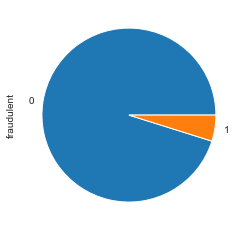

In [53]:
Y.value_counts().plot(kind='pie')

In [54]:
smk  = SMOTETomek()
X_res,Y_res= smk.fit_resample(X,Y)

In [55]:
X_res.shape,Y_res.shape

((34028, 100), (34028,))

<AxesSubplot:ylabel='fraudulent'>

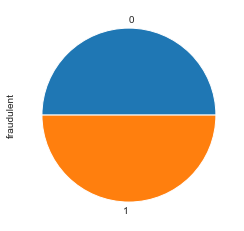

In [56]:
Y_res.value_counts().plot(kind="pie")

## Test Train Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_res,Y_res, test_size=0.25)

## Random Forest Classifier

In [58]:
rfc = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=200,criterion="entropy",max_depth=50)
rfc=rfc.fit(X_train,y_train)

In [59]:
rfc.score(X_train,y_train)

0.9999216331648446

In [60]:
rfc.score(X_test,y_test)

0.9943575878688139

In [61]:
rfc_predict = rfc.predict(X_test)

In [62]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4282
           1       0.99      1.00      0.99      4225

    accuracy                           0.99      8507
   macro avg       0.99      0.99      0.99      8507
weighted avg       0.99      0.99      0.99      8507



In [63]:
conf1=confusion_matrix(y_test, rfc_predict)
conf1

array([[4253,   29],
       [  19, 4206]], dtype=int64)

## XG Boost

In [64]:
import xgboost as xgb

In [65]:
xgb_clf = xgb.XGBClassifier(n_estimators=200,max_depth=30)
xgb_clf.fit(X_train, y_train)

[22:40:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=30, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb_clf.score(X_train,y_train)

0.9999216331648446

In [67]:
xgb_clf.score(X_test,y_test)

0.9941224873633479

In [68]:
xgb_predict =xgb_clf.predict(X_test)

In [69]:
conf2=confusion_matrix(y_test, xgb_predict)
conf2

array([[4248,   34],
       [  16, 4209]], dtype=int64)

## KNN

In [70]:
NNH = KNeighborsClassifier(n_neighbors= 2 ,metric='euclidean' )

In [71]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [72]:
NNH.score(X_train, y_train)

0.9998432663296892

In [73]:
NNH.score(X_test, y_test)

0.9522745973903843

In [74]:
knn_predict=NNH.predict(X_test)

In [75]:
conf3=confusion_matrix(y_test, knn_predict)
conf3

array([[3877,  405],
       [   1, 4224]], dtype=int64)

## Naive Bayes Classifier

In [76]:
nbc = GaussianNB()

In [77]:
nbc.fit(X_train, y_train)

GaussianNB()

In [78]:
nbc.score(X_train,y_train)

0.7841777359821324

In [79]:
nbc.score(X_test, y_test)

0.7907605501351828

In [80]:
nbc_predict=nbc.predict(X_test)

In [81]:
conf4=confusion_matrix(y_test, nbc_predict)
conf4

array([[3253, 1029],
       [ 751, 3474]], dtype=int64)

## Deciding on algorithm

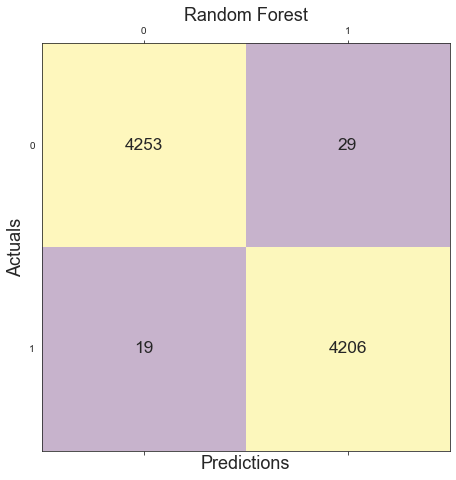

In [82]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf1, cmap=plt.cm.viridis, alpha=0.3)
for i in range(conf1.shape[0]):
    for j in range(conf1.shape[1]):
        ax.text(x=j, y=i,s=conf1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Random Forest', fontsize=18)
plt.show()

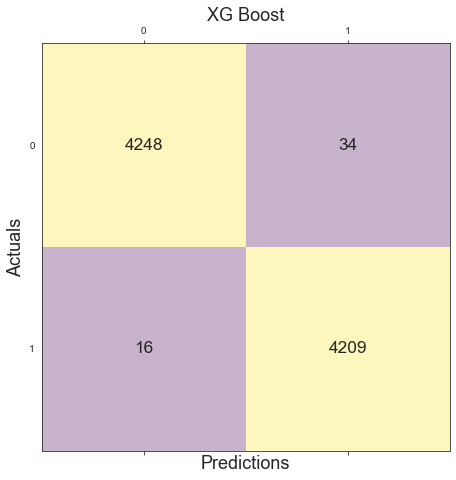

In [83]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf2, cmap=plt.cm.viridis, alpha=0.3)
for i in range(conf2.shape[0]):
    for j in range(conf2.shape[1]):
        ax.text(x=j, y=i,s=conf2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('XG Boost', fontsize=18)
plt.show()

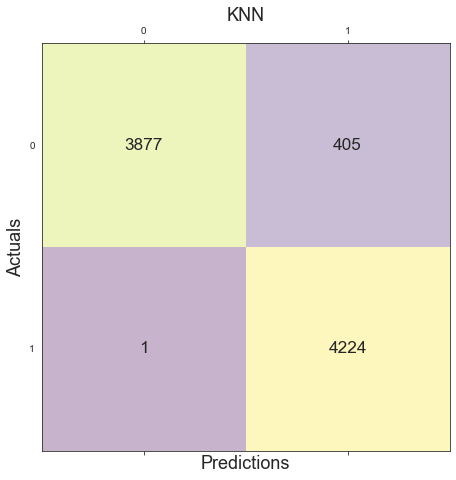

In [84]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf3, cmap=plt.cm.viridis, alpha=0.3)
for i in range(conf3.shape[0]):
    for j in range(conf3.shape[1]):
        ax.text(x=j, y=i,s=conf3[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('KNN', fontsize=18)
plt.show()

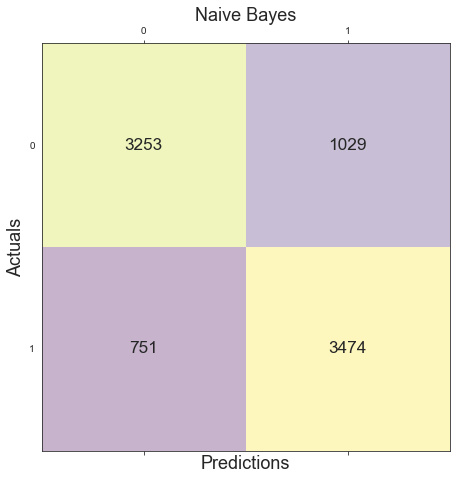

In [85]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf4, cmap=plt.cm.viridis, alpha=0.3)
for i in range(conf4.shape[0]):
    for j in range(conf4.shape[1]):
        ax.text(x=j, y=i,s=conf4[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Naive Bayes', fontsize=18)
plt.show()

### By looking at the confusion matrices of the different algorithms, we can see that the number of mispredictions is the least for random forest. Therefore random forest is chosen as the algorithm for the classification model.

## Testing

In [86]:
# Genuine Posting
df_test_1=X.iloc[0]
df_test_1=df_test_1.to_frame().transpose()

rfc.predict(df_test_1)

array([0], dtype=int64)

In [87]:
# Fake Posting
df_test_2=X.iloc[17827]
df_test_2=df_test_2.to_frame().transpose()

rfc.predict(df_test_2)

array([1], dtype=int64)

## Deployment

In [88]:
data={'model':rfc}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)